In [355]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import *

# Incorporated citipy to determine city based on latitude and longitude
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats

# Output File (CSV)
travel_2013 = "Resources/403043874_T_T100I_MARKET_US_CARRIER_ONLY_2013_All.csv"
travel_2014 = "Resources/403043874_T_T100I_MARKET_US_CARRIER_ONLY_2014_All.csv"
travel_2015 = "Resources/403043874_T_T100I_MARKET_US_CARRIER_ONLY_2015_All.csv"
travel_2016 = "Resources/403043874_T_T100I_MARKET_US_CARRIER_ONLY_2016_All.csv"
travel_2017 = "Resources/403043874_T_T100I_MARKET_US_CARRIER_ONLY_2017_All.csv"

In [2]:
travel_2013_df = pd.read_csv(travel_2013)
travel_2013_df.head()

,PASSENGERS,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 19
0,0.0,NC,20108,Northern Air Cargo Inc.,13061,33038,LRD,"Laredo, TX",US,14022,34022,PBC,"Puebla, Mexico",MX,2013,1,1,2,P,NaN
1,0.0,NC,20108,Northern Air Cargo Inc.,14022,34022,PBC,"Puebla, Mexico",MX,13061,33038,LRD,"Laredo, TX",US,2013,1,1,2,P,NaN
2,0.0,NC,20108,Northern Air Cargo Inc.,14022,34022,PBC,"Puebla, Mexico",MX,14730,33044,SDF,"Louisville, KY",US,2013,1,1,4,P,NaN
3,0.0,8C,19874,Air Transport International,10711,30711,BOG,"Bogota, Colombia",CO,13303,32467,MIA,"Miami, FL",US,2013,1,1,4,P,NaN
4,0.0,8C,19874,Air Transport International,13218,31565,MDE,"Medellin, Colombia",CO,13303,32467,MIA,"Miami, FL",US,2013,1,1,3,P,NaN


In [3]:
travel_2013_origin_dest_quarter_df = travel_2013_df.groupby(['ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'QUARTER'])[['PASSENGERS']].sum()
travel_2013_origin_dest_quarter_df = travel_2013_origin_dest_quarter_df.reset_index(level=['DEST_CITY_NAME', 'QUARTER', 'ORIGIN_CITY_NAME'])
travel_2013_origin_dest_quarter_df = travel_2013_origin_dest_quarter_df.sort_values('PASSENGERS', ascending=False)
#travel_2013_origin_dest_quarter_df.head(10)
travel_2013_origin_dest_quarter_df = travel_2013_origin_dest_quarter_df.loc[('US')]
travel_2013_origin_dest_quarter_df = travel_2013_origin_dest_quarter_df.reset_index().set_index('ORIGIN_CITY_NAME')
travel_2013_origin_dest_quarter_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,QUARTER,PASSENGERS
ORIGIN_CITY_NAME,,,,
"New York, NY",US,"London, United Kingdom",3,130931.0
"New York, NY",US,"London, United Kingdom",2,130073.0
"Chicago, IL",US,"London, United Kingdom",3,121551.0
"Chicago, IL",US,"London, United Kingdom",2,119493.0
"Guam, TT",US,"Tokyo, Japan",3,115948.0
"Guam, TT",US,"Tokyo, Japan",1,114945.0
"New York, NY",US,"Santiago, Dominican Republic",3,113104.0
"New York, NY",US,"London, United Kingdom",4,112612.0
"Honolulu, HI",US,"Tokyo, Japan",3,107363.0


In [4]:
travel_2014_df = pd.read_csv(travel_2014)
travel_2014_df.head()

,PASSENGERS,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 19
0,0.0,5X,19917,United Parcel Service,10559,30559,BFI,"Seattle, WA",US,16229,31215,YVR,"Vancouver, Canada",CA,2014,1,1,1,G,NaN
1,0.0,5X,19917,United Parcel Service,11775,31775,FSD,"Sioux Falls, SD",US,16257,30863,YYC,"Calgary, Canada",CA,2014,1,1,2,G,NaN
2,0.0,5X,19917,United Parcel Service,13487,31650,MSP,"Minneapolis, MN",US,16232,36232,YWG,"Winnipeg, Canada",CA,2014,1,1,1,G,NaN
3,0.0,5X,19917,United Parcel Service,13871,33316,OMA,"Omaha, NE",US,16257,30863,YYC,"Calgary, Canada",CA,2014,1,1,3,G,NaN
4,0.0,5X,19917,United Parcel Service,14057,34057,PDX,"Portland, OR",US,16229,31215,YVR,"Vancouver, Canada",CA,2014,1,1,1,G,NaN


In [5]:
travel_2014_origin_dest_quarter_df = travel_2014_df.groupby(['ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'QUARTER'])[['PASSENGERS']].sum()
travel_2014_origin_dest_quarter_df = travel_2014_origin_dest_quarter_df.reset_index(level=['DEST_CITY_NAME', 'QUARTER', 'ORIGIN_CITY_NAME'])
travel_2014_origin_dest_quarter_df = travel_2014_origin_dest_quarter_df.sort_values('PASSENGERS', ascending=False)
travel_2014_origin_dest_quarter_df = travel_2014_origin_dest_quarter_df.loc[('US')]
travel_2014_origin_dest_quarter_df = travel_2014_origin_dest_quarter_df.reset_index().set_index('ORIGIN_CITY_NAME')
travel_2014_origin_dest_quarter_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,QUARTER,PASSENGERS
ORIGIN_CITY_NAME,,,,
"New York, NY",US,"Santo Domingo, Dominican Republic",3,118210.0
"New York, NY",US,"Santiago, Dominican Republic",3,115983.0
"New York, NY",US,"London, United Kingdom",2,115269.0
"Chicago, IL",US,"London, United Kingdom",2,109512.0
"Honolulu, HI",US,"Tokyo, Japan",3,105870.0
"Chicago, IL",US,"London, United Kingdom",3,105360.0
"Guam, TT",US,"Tokyo, Japan",1,104834.0
"New York, NY",US,"London, United Kingdom",3,104688.0
"Guam, TT",US,"Tokyo, Japan",3,104393.0


In [6]:
travel_2015_df = pd.read_csv(travel_2015)
travel_2015_df.head()

,PASSENGERS,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 19
0,0.0,X9,20377.0,Omni Air International LLC,11435,31435,DUB,"Dublin, Ireland",IE,12889,32211,LAS,"Las Vegas, NV",US,2015,2,4,10,L,NaN
1,0.0,0WQ,21352.0,Avjet Corporation,10800,32575,BUR,"Burbank, CA",US,14312,34312,PVR,"Puerto Vallarta, Mexico",MX,2015,2,4,3,L,NaN
2,0.0,1YQ,21615.0,"Air Charter, Inc d/b/a Air Flamenco",14843,34819,SJU,"San Juan, PR",US,11519,34448,EIS,"Road Town, British Virgin Islands",VG,2015,2,4,1,P,NaN
3,0.0,FX,20107.0,Federal Express Corporation,10792,30792,BUF,"Buffalo, NY",US,16149,36149,YOW,"Ottawa, Canada",CA,2015,2,4,1,G,NaN
4,0.0,FX,20107.0,Federal Express Corporation,11898,31898,GFK,"Grand Forks, ND",US,16232,36232,YWG,"Winnipeg, Canada",CA,2015,2,4,1,G,NaN


In [7]:
travel_2015_origin_dest_quarter_df = travel_2015_df.groupby(['ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'QUARTER'])[['PASSENGERS']].sum()
travel_2015_origin_dest_quarter_df = travel_2015_origin_dest_quarter_df.reset_index(level=['DEST_CITY_NAME', 'QUARTER', 'ORIGIN_CITY_NAME'])
travel_2015_origin_dest_quarter_df = travel_2015_origin_dest_quarter_df.sort_values('PASSENGERS', ascending=False)
travel_2015_origin_dest_quarter_df = travel_2015_origin_dest_quarter_df.loc[('US')]
travel_2015_origin_dest_quarter_df = travel_2015_origin_dest_quarter_df.reset_index().set_index('ORIGIN_CITY_NAME')
travel_2015_origin_dest_quarter_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,QUARTER,PASSENGERS
ORIGIN_CITY_NAME,,,,
"New York, NY",US,"Santo Domingo, Dominican Republic",3,131334.0
"New York, NY",US,"Santiago, Dominican Republic",3,120779.0
"New York, NY",US,"London, United Kingdom",4,110847.0
"New York, NY",US,"Santo Domingo, Dominican Republic",4,110016.0
"Dallas/Fort Worth, TX",US,"Cancun, Mexico",2,106828.0
"New York, NY",US,"London, United Kingdom",2,105781.0
"New York, NY",US,"Santiago, Dominican Republic",4,105341.0
"Guam, TT",US,"Tokyo, Japan",3,104744.0
"Guam, TT",US,"Tokyo, Japan",1,104002.0


In [8]:
travel_2016_df = pd.read_csv(travel_2016)
travel_2016_df.head()

,PASSENGERS,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 19
0,0.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",10849,30849,BZN,"Bozeman, MT",US,16232,36232,YWG,"Winnipeg, Canada",CA,2016,1,1,2,L,NaN
1,0.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",12197,31703,HPN,"White Plains, NY",US,16217,36083,YUL,"Montreal, Canada",CA,2016,1,1,1,L,NaN
2,0.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",12197,31703,HPN,"White Plains, NY",US,16271,36106,YYZ,"Toronto, Canada",CA,2016,1,1,1,L,NaN
3,0.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13244,33244,MEM,"Memphis, TN",US,16042,36039,YEG,"Edmonton, Canada",CA,2016,1,1,4,L,NaN
4,0.0,09Q,21161,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",13303,32467,MIA,"Miami, FL",US,11075,31075,CMW,"Camaguey, Cuba",CU,2016,1,1,1,L,NaN


In [9]:
travel_2016_origin_dest_quarter_df = travel_2016_df.groupby(['ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'QUARTER'])[['PASSENGERS']].sum()
travel_2016_origin_dest_quarter_df = travel_2016_origin_dest_quarter_df.reset_index(level=['DEST_CITY_NAME', 'QUARTER', 'ORIGIN_CITY_NAME'])
travel_2016_origin_dest_quarter_df = travel_2016_origin_dest_quarter_df.sort_values('PASSENGERS', ascending=False)
travel_2016_origin_dest_quarter_df = travel_2016_origin_dest_quarter_df.loc[('US')]
travel_2016_origin_dest_quarter_df = travel_2016_origin_dest_quarter_df.reset_index().set_index('ORIGIN_CITY_NAME')
travel_2016_origin_dest_quarter_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,QUARTER,PASSENGERS
ORIGIN_CITY_NAME,,,,
"New York, NY",US,"Santo Domingo, Dominican Republic",3,130475.0
"Houston, TX",US,"Cancun, Mexico",2,113478.0
"New York, NY",US,"Santiago, Dominican Republic",3,113093.0
"New York, NY",US,"London, United Kingdom",4,111294.0
"New York, NY",US,"Santo Domingo, Dominican Republic",4,108986.0
"New York, NY",US,"Santo Domingo, Dominican Republic",2,108565.0
"Guam, TT",US,"Tokyo, Japan",1,105711.0
"New York, NY",US,"London, United Kingdom",2,105700.0
"Honolulu, HI",US,"Tokyo, Japan",3,105591.0


In [10]:
travel_2017_df = pd.read_csv(travel_2017)
travel_2017_df.head()

,PASSENGERS,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,Unnamed: 19
0,0.0,FX,20107,Federal Express Corporation,11637,31637,FAR,"Fargo, ND",US,16232,36232,YWG,"Winnipeg, Canada",CA,2017,1,1,1,G,NaN
1,0.0,FX,20107,Federal Express Corporation,12339,32337,IND,"Indianapolis, IN",US,16128,36083,YMX,"Montreal, Canada",CA,2017,1,1,2,G,NaN
2,0.0,FX,20107,Federal Express Corporation,12339,32337,IND,"Indianapolis, IN",US,16271,36106,YYZ,"Toronto, Canada",CA,2017,1,1,1,G,NaN
3,0.0,FX,20107,Federal Express Corporation,13244,33244,MEM,"Memphis, TN",US,16042,36039,YEG,"Edmonton, Canada",CA,2017,1,1,4,G,NaN
4,0.0,FX,20107,Federal Express Corporation,13244,33244,MEM,"Memphis, TN",US,16128,36083,YMX,"Montreal, Canada",CA,2017,1,1,3,G,NaN


In [11]:
travel_2017_origin_dest_quarter_df = travel_2017_df.groupby(['ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'QUARTER'])[['PASSENGERS']].sum()
travel_2017_origin_dest_quarter_df = travel_2017_origin_dest_quarter_df.reset_index(level=['DEST_CITY_NAME', 'QUARTER', 'ORIGIN_CITY_NAME'])
travel_2017_origin_dest_quarter_df = travel_2017_origin_dest_quarter_df.sort_values('PASSENGERS', ascending=False)
travel_2017_origin_dest_quarter_df = travel_2017_origin_dest_quarter_df.loc[('US')]
travel_2017_origin_dest_quarter_df = travel_2017_origin_dest_quarter_df.reset_index().set_index('ORIGIN_CITY_NAME')
travel_2017_origin_dest_quarter_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,QUARTER,PASSENGERS
ORIGIN_CITY_NAME,,,,
"New York, NY",US,"London, United Kingdom",4,126726.0
"Houston, TX",US,"Cancun, Mexico",2,126556.0
"New York, NY",US,"Santo Domingo, Dominican Republic",3,126036.0
"New York, NY",US,"London, United Kingdom",3,124175.0
"New York, NY",US,"London, United Kingdom",2,124165.0
"Honolulu, HI",US,"Tokyo, Japan",3,122221.0
"New York, NY",US,"Santiago, Dominican Republic",3,119550.0
"Chicago, IL",US,"Cancun, Mexico",1,118936.0
"New York, NY",US,"Santo Domingo, Dominican Republic",4,117690.0


In [32]:
travel_2013_new_df = travel_2013_df.groupby(['ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
travel_2013_new_df = travel_2013_new_df.reset_index(level=['DEST_CITY_NAME', 'DEST_COUNTRY'])
travel_2013_new_df = travel_2013_new_df.sort_values('PASSENGERS', ascending=False)
travel_2013_new_df = travel_2013_new_df.loc[('US')]
#travel_2013_new_df = travel_2013_new_df.reset_index().set_index('DEST_CITY_NAME')
travel_2013_new_df = travel_2013_new_df.reset_index()
travel_2013_new_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS
0,US,"Cancun, Mexico",MX,2954391.0
1,US,"London, United Kingdom",GB,2797514.0
2,US,"Tokyo, Japan",JP,2612234.0
3,US,"Toronto, Canada",CA,1651351.0
4,US,"Amsterdam, Netherlands",NL,1498533.0
5,US,"Mexico City, Mexico",MX,1470428.0
6,US,"Paris, France",FR,1321194.0
7,US,"Frankfurt, Germany",DE,1176003.0
8,US,"Vancouver, Canada",CA,1114187.0
9,US,"San Jose del Cabo, Mexico",MX,1071654.0


In [33]:
travel_2014_new_df = travel_2014_df.groupby(['ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
travel_2014_new_df = travel_2014_new_df.reset_index(level=['DEST_CITY_NAME', 'DEST_COUNTRY'])
travel_2014_new_df = travel_2014_new_df.sort_values('PASSENGERS', ascending=False)
travel_2014_new_df = travel_2014_new_df.loc[('US')]
#travel_2014_new_df = travel_2014_new_df.reset_index().set_index('DEST_CITY_NAME')
travel_2014_new_df = travel_2014_new_df.reset_index()
travel_2014_new_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS
0,US,"Cancun, Mexico",MX,3329751.0
1,US,"London, United Kingdom",GB,2745845.0
2,US,"Tokyo, Japan",JP,2473841.0
3,US,"Toronto, Canada",CA,1638482.0
4,US,"Mexico City, Mexico",MX,1501717.0
5,US,"Amsterdam, Netherlands",NL,1449692.0
6,US,"Paris, France",FR,1405055.0
7,US,"Vancouver, Canada",CA,1222692.0
8,US,"Punta Cana, Dominican Republic",DO,1172534.0
9,US,"Sao Paulo, Brazil",BR,1095809.0


In [34]:
travel_2015_new_df = travel_2015_df.groupby(['ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
travel_2015_new_df = travel_2015_new_df.reset_index(level=['DEST_CITY_NAME', 'DEST_COUNTRY'])
travel_2015_new_df = travel_2015_new_df.sort_values('PASSENGERS', ascending=False)
travel_2015_new_df = travel_2015_new_df.loc[('US')]
#travel_2015_new_df = travel_2015_new_df.reset_index().set_index('DEST_CITY_NAME')
travel_2015_new_df = travel_2015_new_df.reset_index()
travel_2015_new_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS
0,US,"Cancun, Mexico",MX,3871799.0
1,US,"London, United Kingdom",GB,2781709.0
2,US,"Tokyo, Japan",JP,2418778.0
3,US,"Toronto, Canada",CA,1610192.0
4,US,"Mexico City, Mexico",MX,1566517.0
5,US,"Amsterdam, Netherlands",NL,1540559.0
6,US,"Paris, France",FR,1455618.0
7,US,"Punta Cana, Dominican Republic",DO,1362038.0
8,US,"Vancouver, Canada",CA,1242618.0
9,US,"San Jose del Cabo, Mexico",MX,1157689.0


In [35]:
travel_2016_new_df = travel_2016_df.groupby(['ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
travel_2016_new_df = travel_2016_new_df.reset_index(level=['DEST_CITY_NAME', 'DEST_COUNTRY'])
travel_2016_new_df = travel_2016_new_df.sort_values('PASSENGERS', ascending=False)
travel_2016_new_df = travel_2016_new_df.loc[('US')]
#travel_2016_new_df = travel_2016_new_df.reset_index().set_index('DEST_CITY_NAME')
travel_2016_new_df = travel_2016_new_df.reset_index()
travel_2016_new_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS
0,US,"Cancun, Mexico",MX,4136251.0
1,US,"London, United Kingdom",GB,2733856.0
2,US,"Tokyo, Japan",JP,2393795.0
3,US,"Mexico City, Mexico",MX,1728504.0
4,US,"Toronto, Canada",CA,1588879.0
5,US,"Amsterdam, Netherlands",NL,1549281.0
6,US,"Punta Cana, Dominican Republic",DO,1471943.0
7,US,"Paris, France",FR,1446488.0
8,US,"San Jose del Cabo, Mexico",MX,1312551.0
9,US,"Vancouver, Canada",CA,1226928.0


In [36]:
travel_2017_new_df = travel_2017_df.groupby(['ORIGIN_COUNTRY', 'DEST_CITY_NAME', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
travel_2017_new_df = travel_2017_new_df.reset_index(level=['DEST_CITY_NAME', 'DEST_COUNTRY'])
travel_2017_new_df = travel_2017_new_df.sort_values('PASSENGERS', ascending=False)
travel_2017_new_df = travel_2017_new_df.loc[('US')]
#travel_2017_new_df = travel_2017_new_df.reset_index().set_index('DEST_CITY_NAME')
travel_2017_new_df = travel_2017_new_df.reset_index()
travel_2017_new_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS
0,US,"Cancun, Mexico",MX,4513217.0
1,US,"London, United Kingdom",GB,2999371.0
2,US,"Tokyo, Japan",JP,2339026.0
3,US,"Mexico City, Mexico",MX,1731296.0
4,US,"Amsterdam, Netherlands",NL,1677886.0
5,US,"Toronto, Canada",CA,1627132.0
6,US,"San Jose del Cabo, Mexico",MX,1524246.0
7,US,"Punta Cana, Dominican Republic",DO,1500701.0
8,US,"Paris, France",FR,1500452.0
9,US,"Montego Bay, Jamaica",JM,1308825.0


In [37]:
travel_2013_new_df['LOC_RANK'] = travel_2013_new_df['PASSENGERS'].rank(ascending=False)
travel_2014_new_df['LOC_RANK'] = travel_2014_new_df['PASSENGERS'].rank(ascending=False)
travel_2015_new_df['LOC_RANK'] = travel_2015_new_df['PASSENGERS'].rank(ascending=False)
travel_2016_new_df['LOC_RANK'] = travel_2016_new_df['PASSENGERS'].rank(ascending=False)
travel_2017_new_df['LOC_RANK'] = travel_2017_new_df['PASSENGERS'].rank(ascending=False)
travel_2013_new_df.head()

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS,LOC_RANK
0,US,"Cancun, Mexico",MX,2954391.0,1.0
1,US,"London, United Kingdom",GB,2797514.0,2.0
2,US,"Tokyo, Japan",JP,2612234.0,3.0
3,US,"Toronto, Canada",CA,1651351.0,4.0
4,US,"Amsterdam, Netherlands",NL,1498533.0,5.0


In [38]:
travel_merge_df = travel_2013_new_df.merge(travel_2014_new_df, on=["ORIGIN_COUNTRY", "DEST_CITY_NAME", "DEST_COUNTRY"], how="outer", suffixes=["_2013", "_2014"])
travel_merge_df = travel_merge_df.merge(travel_2015_new_df, on=["ORIGIN_COUNTRY", "DEST_CITY_NAME", "DEST_COUNTRY"], how="outer")
travel_merge_df = travel_merge_df.rename(columns={'PASSENGERS': "PASSENGERS_2015", "LOC_RANK": "LOC_RANK_2015"})
travel_merge_df = travel_merge_df.merge(travel_2016_new_df, on=["ORIGIN_COUNTRY", "DEST_CITY_NAME", "DEST_COUNTRY"], how="outer")
travel_merge_df = travel_merge_df.rename(columns={'PASSENGERS': "PASSENGERS_2016", "LOC_RANK": "LOC_RANK_2016"})
travel_merge_df = travel_merge_df.merge(travel_2017_new_df, on=["ORIGIN_COUNTRY", "DEST_CITY_NAME", "DEST_COUNTRY"], how="outer")
travel_merge_df = travel_merge_df.rename(columns={'PASSENGERS': "PASSENGERS_2017", "LOC_RANK": "LOC_RANK_2017"})
travel_merge_df["LOC_RANK_AVG"] = (travel_merge_df["LOC_RANK_2013"] + travel_merge_df["LOC_RANK_2014"] + 
                              travel_merge_df["LOC_RANK_2015"] + travel_merge_df["LOC_RANK_2016"] + 
                              travel_merge_df["LOC_RANK_2017"])/5
travel_merge_df.head()

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS_2013,LOC_RANK_2013,PASSENGERS_2014,LOC_RANK_2014,PASSENGERS_2015,LOC_RANK_2015,PASSENGERS_2016,LOC_RANK_2016,PASSENGERS_2017,LOC_RANK_2017,LOC_RANK_AVG
0,US,"Cancun, Mexico",MX,2954391.0,1.0,3329751.0,1.0,3871799.0,1.0,4136251.0,1.0,4513217.0,1.0,1.0
1,US,"London, United Kingdom",GB,2797514.0,2.0,2745845.0,2.0,2781709.0,2.0,2733856.0,2.0,2999371.0,2.0,2.0
2,US,"Tokyo, Japan",JP,2612234.0,3.0,2473841.0,3.0,2418778.0,3.0,2393795.0,3.0,2339026.0,3.0,3.0
3,US,"Toronto, Canada",CA,1651351.0,4.0,1638482.0,4.0,1610192.0,4.0,1588879.0,5.0,1627132.0,6.0,4.6
4,US,"Amsterdam, Netherlands",NL,1498533.0,5.0,1449692.0,6.0,1540559.0,6.0,1549281.0,6.0,1677886.0,5.0,5.6


In [39]:
travel_merge_sorted_df = travel_merge_df.sort_values('LOC_RANK_AVG', ascending=True)
travel_merge_sorted_df = travel_merge_sorted_df.reset_index(drop=True)
travel_merge_sorted_df.head(10)

,ORIGIN_COUNTRY,DEST_CITY_NAME,DEST_COUNTRY,PASSENGERS_2013,LOC_RANK_2013,PASSENGERS_2014,LOC_RANK_2014,PASSENGERS_2015,LOC_RANK_2015,PASSENGERS_2016,LOC_RANK_2016,PASSENGERS_2017,LOC_RANK_2017,LOC_RANK_AVG
0,US,"Cancun, Mexico",MX,2954391.0,1.0,3329751.0,1.0,3871799.0,1.0,4136251.0,1.0,4513217.0,1.0,1.0
1,US,"London, United Kingdom",GB,2797514.0,2.0,2745845.0,2.0,2781709.0,2.0,2733856.0,2.0,2999371.0,2.0,2.0
2,US,"Tokyo, Japan",JP,2612234.0,3.0,2473841.0,3.0,2418778.0,3.0,2393795.0,3.0,2339026.0,3.0,3.0
3,US,"Toronto, Canada",CA,1651351.0,4.0,1638482.0,4.0,1610192.0,4.0,1588879.0,5.0,1627132.0,6.0,4.6
4,US,"Mexico City, Mexico",MX,1470428.0,6.0,1501717.0,5.0,1566517.0,5.0,1728504.0,4.0,1731296.0,4.0,4.8
5,US,"Amsterdam, Netherlands",NL,1498533.0,5.0,1449692.0,6.0,1540559.0,6.0,1549281.0,6.0,1677886.0,5.0,5.6
6,US,"Paris, France",FR,1321194.0,7.0,1405055.0,7.0,1455618.0,7.0,1446488.0,8.0,1500452.0,9.0,7.6
7,US,"Punta Cana, Dominican Republic",DO,966598.0,13.0,1172534.0,9.0,1362038.0,8.0,1471943.0,7.0,1500701.0,8.0,9.0
8,US,"Vancouver, Canada",CA,1114187.0,9.0,1222692.0,8.0,1242618.0,9.0,1226928.0,10.0,1236329.0,11.0,9.4
9,US,"San Jose del Cabo, Mexico",MX,1071654.0,10.0,1051980.0,13.0,1157689.0,10.0,1312551.0,9.0,1524246.0,7.0,9.8


In [40]:
travel_merge_sorted_df.to_csv("Resources/analysis.csv")

,YEAR,MONTH,DEST_COUNTRY,PASSENGERS
DEST_CITY_NAME,,,,
"Abu Dhabi, United Arab Emirates",2013,10,AE,0.0
"Abuja, Nigeria",2013,5,NG,0.0
"Abuja, Nigeria",2013,6,NG,0.0
"Abuja, Nigeria",2013,7,NG,0.0
"Abuja, Nigeria",2013,8,NG,0.0
"Acapulco, Mexico",2013,1,MX,1030.0
"Acapulco, Mexico",2013,2,MX,840.0
"Acapulco, Mexico",2013,3,MX,898.0
"Acapulco, Mexico",2013,4,MX,649.0


In [218]:
travel_merge_sorted_df
top_ten_cities = []
top_ten_dest = travel_merge_sorted_df["DEST_CITY_NAME"].head(10)
for dest in top_ten_dest:
    top_ten_cities.append(dest)
top_ten_cities

['Cancun, Mexico',
 'London, United Kingdom',
 'Tokyo, Japan',
 'Toronto, Canada',
 'Mexico City, Mexico',
 'Amsterdam, Netherlands',
 'Paris, France',
 'Punta Cana, Dominican Republic',
 'Vancouver, Canada',
 'San Jose del Cabo, Mexico']

In [320]:
top_ten_month_2013_df = travel_2013_df.groupby(['DEST_CITY_NAME', 'YEAR', 'MONTH', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
top_ten_month_2013_df = top_ten_month_2013_df.reset_index(level=['DEST_COUNTRY', 'YEAR', 'MONTH'])
top_ten_month_2013_df = top_ten_month_2013_df.loc[top_ten_month_2013_df['DEST_COUNTRY'] != 'US']
top_ten_month_2013_df.head(10)

,YEAR,MONTH,DEST_COUNTRY,PASSENGERS
DEST_CITY_NAME,,,,
"Abu Dhabi, United Arab Emirates",2013,10,AE,0.0
"Abuja, Nigeria",2013,5,NG,0.0
"Abuja, Nigeria",2013,6,NG,0.0
"Abuja, Nigeria",2013,7,NG,0.0
"Abuja, Nigeria",2013,8,NG,0.0
"Acapulco, Mexico",2013,1,MX,1030.0
"Acapulco, Mexico",2013,2,MX,840.0
"Acapulco, Mexico",2013,3,MX,898.0
"Acapulco, Mexico",2013,4,MX,649.0


In [321]:
top_ten_month_2013_df = top_ten_month_2013_df.loc[top_ten_cities]
top_ten_month_2013_df = top_ten_month_2013_df.reset_index(level=['DEST_CITY_NAME'])
top_ten_month_2013_df = top_ten_month_2013_df.set_index(['DEST_CITY_NAME', 'YEAR', 'MONTH'])
top_ten_month_2013_df.head()

DEST_COUNTRY  PASSENGERS
DEST_CITY_NAME YEAR MONTH                         
Cancun, Mexico 2013 1               MX    243338.0
                    2               MX    260307.0
                    3               MX    335126.0
                    4               MX    257706.0
                    5               MX    262654.0

In [322]:
columns=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
for x in columns:
    top_ten_month_2013_df[x] = top_ten_month_2013_df.apply(lambda _: np.NaN, axis=1)
top_ten_month_2013_df.head()

DEST_COUNTRY  PASSENGERS  JAN  FEB  MAR  APR  MAY  \
DEST_CITY_NAME YEAR MONTH                                                     
Cancun, Mexico 2013 1               MX    243338.0  NaN  NaN  NaN  NaN  NaN   
                    2               MX    260307.0  NaN  NaN  NaN  NaN  NaN   
                    3               MX    335126.0  NaN  NaN  NaN  NaN  NaN   
                    4               MX    257706.0  NaN  NaN  NaN  NaN  NaN   
                    5               MX    262654.0  NaN  NaN  NaN  NaN  NaN   

                           JUN  JUL  AUG  SEP  OCT  NOV  DEC  
DEST_CITY_NAME YEAR MONTH                                     
Cancun, Mexico 2013 1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
                    2      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
                    3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
                    4      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
                    5      NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [323]:
for city in top_ten_cities:
    for x in range(1,13):
        top_ten_month_2013_df.loc[(city, 2013, 1), columns[x-1]] = top_ten_month_2013_df.loc[(city, 2013, x), : "PASSENGERS"][1]

C:\Users\charl\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


In [324]:
top_ten_month_2013_df = top_ten_month_2013_df.reset_index(level=['MONTH'], drop=True)

In [325]:
top_ten_month_2013_df = top_ten_month_2013_df.dropna(how="any")

In [326]:
top_ten_month_2013_df['PASSENGERS'] = top_ten_month_2013_df["JAN"] + top_ten_month_2013_df["FEB"] + top_ten_month_2013_df["MAR"] + \
                                 top_ten_month_2013_df["APR"] + top_ten_month_2013_df["MAY"] + top_ten_month_2013_df["JUN"] + \
                                 top_ten_month_2013_df["JUL"] + top_ten_month_2013_df["AUG"] + top_ten_month_2013_df["SEP"] + \
                                 top_ten_month_2013_df["OCT"] + top_ten_month_2013_df["NOV"] + top_ten_month_2013_df["DEC"]

In [327]:
top_ten_month_2013_df

,,DEST_COUNTRY,PASSENGERS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DEST_CITY_NAME,YEAR,,,,,,,,,,,,,,
"Cancun, Mexico",2013,MX,2954391.0,243338.0,260307.0,335126.0,257706.0,262654.0,275327.0,273851.0,235885.0,144330.0,175130.0,217408.0,273329.0
"London, United Kingdom",2013,GB,2797514.0,182396.0,141724.0,209516.0,230147.0,274723.0,294647.0,263591.0,285583.0,281885.0,227579.0,188430.0,217293.0
"Tokyo, Japan",2013,JP,2612234.0,210495.0,202885.0,234854.0,181580.0,221660.0,238510.0,225707.0,248870.0,221712.0,215738.0,199522.0,210701.0
"Toronto, Canada",2013,CA,1651351.0,129769.0,114373.0,145755.0,135732.0,147946.0,141979.0,150384.0,168596.0,139784.0,139160.0,119765.0,118108.0
"Mexico City, Mexico",2013,MX,1470428.0,117427.0,99873.0,109929.0,107235.0,110923.0,128979.0,147190.0,138723.0,105585.0,118660.0,127072.0,158832.0
"Amsterdam, Netherlands",2013,NL,1498533.0,89425.0,73576.0,104179.0,124295.0,155463.0,161462.0,148674.0,165006.0,146622.0,127654.0,96116.0,106061.0
"Paris, France",2013,FR,1321194.0,76687.0,65649.0,96798.0,97074.0,128212.0,139954.0,127710.0,137910.0,138758.0,119145.0,89191.0,104106.0
"Punta Cana, Dominican Republic",2013,DO,966598.0,68028.0,71458.0,96041.0,78342.0,80952.0,111167.0,125226.0,88408.0,44595.0,49204.0,68727.0,84450.0
"Vancouver, Canada",2013,CA,1114187.0,73993.0,69637.0,80763.0,76596.0,99378.0,120500.0,134594.0,137460.0,97358.0,76110.0,68394.0,79404.0


In [292]:
top_ten_month_2014_df = travel_2014_df.groupby(['DEST_CITY_NAME', 'YEAR', 'MONTH', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
top_ten_month_2014_df = top_ten_month_2014_df.reset_index(level=['DEST_COUNTRY', 'YEAR', 'MONTH'])
top_ten_month_2014_df = top_ten_month_2014_df.loc[top_ten_month_2014_df['DEST_COUNTRY'] != 'US']

top_ten_month_2014_df = travel_2014_origin_dest_month_df.loc[top_ten_cities]
top_ten_month_2014_df = top_ten_month_2014_df.reset_index(level=['DEST_CITY_NAME'])
top_ten_month_2014_df = top_ten_month_2014_df.set_index(['DEST_CITY_NAME', 'YEAR', 'MONTH'])

columns=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
for x in columns:
    top_ten_month_2014_df[x] = top_ten_month_2014_df.apply(lambda _: np.NaN, axis=1)

for city in top_ten_cities:
    for x in range(1,13):
        top_ten_month_2014_df.loc[(city, 2014, 1), columns[x-1]] = top_ten_month_2014_df.loc[(city, 2014, x), : "PASSENGERS"][1]
        
top_ten_month_2014_df = top_ten_month_2014_df.reset_index(level=['MONTH'], drop=True)

top_ten_month_2014_df = top_ten_month_2014_df.dropna(how="any")

top_ten_month_2014_df['PASSENGERS'] = top_ten_month_2014_df["JAN"] + top_ten_month_2014_df["FEB"] + top_ten_month_2014_df["MAR"] + \
                                 top_ten_month_2014_df["APR"] + top_ten_month_2014_df["MAY"] + top_ten_month_2014_df["JUN"] + \
                                 top_ten_month_2014_df["JUL"] + top_ten_month_2014_df["AUG"] + top_ten_month_2014_df["SEP"] + \
                                 top_ten_month_2014_df["OCT"] + top_ten_month_2014_df["NOV"] + top_ten_month_2014_df["DEC"]
top_ten_month_2014_df

C:\Users\charl\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


,,DEST_COUNTRY,PASSENGERS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DEST_CITY_NAME,YEAR,,,,,,,,,,,,,,
"Cancun, Mexico",2014,MX,3329751.0,271477.0,285503.0,356042.0,291932.0,290454.0,305770.0,322587.0,259315.0,157438.0,209693.0,259984.0,319556.0
"London, United Kingdom",2014,GB,2745845.0,186203.0,139282.0,200812.0,237084.0,270168.0,289936.0,247413.0,277253.0,266087.0,222156.0,192910.0,216541.0
"Tokyo, Japan",2014,JP,2473841.0,207282.0,183720.0,228642.0,171295.0,207734.0,221041.0,208181.0,236415.0,215623.0,205958.0,191586.0,196364.0
"Toronto, Canada",2014,CA,1638482.0,111440.0,110806.0,141780.0,135353.0,150955.0,148785.0,152675.0,159494.0,144728.0,139885.0,121635.0,120946.0
"Mexico City, Mexico",2014,MX,1501717.0,123337.0,101603.0,116411.0,113027.0,115908.0,132531.0,149081.0,139030.0,109709.0,119779.0,123914.0,157387.0
"Amsterdam, Netherlands",2014,NL,1449692.0,92024.0,75205.0,103942.0,110880.0,142314.0,148705.0,132277.0,154280.0,150822.0,132861.0,100080.0,106302.0
"Paris, France",2014,FR,1405055.0,84427.0,65629.0,104760.0,119432.0,144715.0,151090.0,138374.0,147566.0,137011.0,117379.0,87982.0,106690.0
"Punta Cana, Dominican Republic",2014,DO,1172534.0,78653.0,87483.0,115090.0,99988.0,110918.0,129194.0,145574.0,107110.0,56827.0,62873.0,79192.0,99632.0
"Vancouver, Canada",2014,CA,1222692.0,79748.0,77194.0,92039.0,84624.0,107407.0,130653.0,142649.0,147179.0,101825.0,87227.0,82579.0,89568.0


In [291]:
top_ten_month_2015_df = travel_2015_df.groupby(['DEST_CITY_NAME', 'YEAR', 'MONTH', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
top_ten_month_2015_df = top_ten_month_2015_df.reset_index(level=['DEST_COUNTRY', 'YEAR', 'MONTH'])
top_ten_month_2015_df = top_ten_month_2015_df.loc[top_ten_month_2015_df['DEST_COUNTRY'] != 'US']

top_ten_month_2015_df = top_ten_month_2015_df.loc[top_ten_cities]
top_ten_month_2015_df = top_ten_month_2015_df.reset_index(level=['DEST_CITY_NAME'])
top_ten_month_2015_df = top_ten_month_2015_df.set_index(['DEST_CITY_NAME', 'YEAR', 'MONTH'])

columns=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
for x in columns:
    top_ten_month_2015_df[x] = top_ten_month_2015_df.apply(lambda _: np.NaN, axis=1)

for city in top_ten_cities:
    for x in range(1,13):
        top_ten_month_2015_df.loc[(city, 2015, 1), columns[x-1]] = top_ten_month_2015_df.loc[(city, 2015, x), : "PASSENGERS"][1]
        
top_ten_month_2015_df = top_ten_month_2015_df.reset_index(level=['MONTH'], drop=True)

top_ten_month_2015_df = top_ten_month_2015_df.dropna(how="any")

top_ten_month_2015_df['PASSENGERS'] = top_ten_month_2015_df["JAN"] + top_ten_month_2015_df["FEB"] + top_ten_month_2015_df["MAR"] + \
                                 top_ten_month_2015_df["APR"] + top_ten_month_2015_df["MAY"] + top_ten_month_2015_df["JUN"] + \
                                 top_ten_month_2015_df["JUL"] + top_ten_month_2015_df["AUG"] + top_ten_month_2015_df["SEP"] + \
                                 top_ten_month_2015_df["OCT"] + top_ten_month_2015_df["NOV"] + top_ten_month_2015_df["DEC"]
top_ten_month_2015_df

C:\Users\charl\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


,,DEST_COUNTRY,PASSENGERS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DEST_CITY_NAME,YEAR,,,,,,,,,,,,,,
"Cancun, Mexico",2015,MX,3871799.0,316600.0,323530.0,386224.0,345307.0,336096.0,363733.0,382935.0,320904.0,194409.0,243101.0,290648.0,368312.0
"London, United Kingdom",2015,GB,2781709.0,188121.0,144594.0,202117.0,228802.0,258456.0,292027.0,254378.0,281188.0,271873.0,237283.0,202424.0,220446.0
"Tokyo, Japan",2015,JP,2418778.0,194425.0,181901.0,224977.0,166464.0,209733.0,218259.0,207388.0,224359.0,208463.0,202783.0,184822.0,195204.0
"Toronto, Canada",2015,CA,1610192.0,114040.0,109174.0,135736.0,131468.0,145960.0,138528.0,148167.0,157259.0,145360.0,142723.0,125891.0,115886.0
"Mexico City, Mexico",2015,MX,1566517.0,119231.0,96922.0,112165.0,114496.0,115823.0,133074.0,150671.0,141812.0,115518.0,138526.0,147121.0,181158.0
"Amsterdam, Netherlands",2015,NL,1540559.0,92506.0,73814.0,102489.0,131397.0,158984.0,163851.0,148313.0,168319.0,161552.0,143006.0,94755.0,101573.0
"Paris, France",2015,FR,1455618.0,82658.0,65714.0,106026.0,118400.0,150933.0,160326.0,143990.0,150801.0,143312.0,126498.0,94887.0,112073.0
"Punta Cana, Dominican Republic",2015,DO,1362038.0,94145.0,107018.0,134445.0,119816.0,122421.0,151613.0,170379.0,119327.0,65623.0,72579.0,87686.0,116986.0
"Vancouver, Canada",2015,CA,1242618.0,87500.0,79259.0,95907.0,88984.0,115904.0,131054.0,143566.0,144347.0,106747.0,88646.0,76687.0,84017.0


In [288]:
top_ten_month_2016_df = travel_2016_df.groupby(['DEST_CITY_NAME', 'YEAR', 'MONTH', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
top_ten_month_2016_df = top_ten_month_2016_df.reset_index(level=['DEST_COUNTRY', 'YEAR', 'MONTH'])
top_ten_month_2016_df = top_ten_month_2016_df.loc[top_ten_month_2016_df['DEST_COUNTRY'] != 'US']

top_ten_month_2016_df = top_ten_month_2016_df.loc[top_ten_cities]
top_ten_month_2016_df = top_ten_month_2016_df.reset_index(level=['DEST_CITY_NAME'])
top_ten_month_2016_df = top_ten_month_2016_df.set_index(['DEST_CITY_NAME', 'YEAR', 'MONTH'])

columns=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
for x in columns:
    top_ten_month_2016_df[x] = top_ten_month_2016_df.apply(lambda _: np.NaN, axis=1)

for city in top_ten_cities:
    for x in range(1,13):
        top_ten_month_2016_df.loc[(city, 2016, 1), columns[x-1]] = top_ten_month_2016_df.loc[(city, 2016, x), : "PASSENGERS"][1]
        
top_ten_month_2016_df = top_ten_month_2016_df.reset_index(level=['MONTH'], drop=True)

top_ten_month_2016_df = top_ten_month_2016_df.dropna(how="any")

top_ten_month_2016_df['PASSENGERS'] = top_ten_month_2016_df["JAN"] + top_ten_month_2016_df["FEB"] + top_ten_month_2016_df["MAR"] + \
                                 top_ten_month_2016_df["APR"] + top_ten_month_2016_df["MAY"] + top_ten_month_2016_df["JUN"] + \
                                 top_ten_month_2016_df["JUL"] + top_ten_month_2016_df["AUG"] + top_ten_month_2016_df["SEP"] + \
                                 top_ten_month_2016_df["OCT"] + top_ten_month_2016_df["NOV"] + top_ten_month_2016_df["DEC"]
top_ten_month_2016_df

C:\Users\charl\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


,,DEST_COUNTRY,PASSENGERS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DEST_CITY_NAME,YEAR,,,,,,,,,,,,,,
"Cancun, Mexico",2016,MX,4136251.0,339521.0,348946.0,442569.0,362755.0,345835.0,390589.0,418707.0,321024.0,205865.0,256341.0,299700.0,404399.0
"London, United Kingdom",2016,GB,2733856.0,189854.0,144244.0,204878.0,231415.0,243036.0,291347.0,249647.0,264334.0,256168.0,220734.0,204035.0,234164.0
"Tokyo, Japan",2016,JP,2393795.0,187259.0,181669.0,218102.0,160618.0,204508.0,218294.0,200928.0,224132.0,215808.0,201566.0,182397.0,198514.0
"Toronto, Canada",2016,CA,1588879.0,112824.0,113504.0,129763.0,125369.0,141088.0,139626.0,149192.0,153925.0,147355.0,142414.0,125478.0,108341.0
"Mexico City, Mexico",2016,MX,1728504.0,146113.0,126459.0,141500.0,122441.0,133772.0,150746.0,165497.0,151070.0,129219.0,143185.0,144939.0,173563.0
"Amsterdam, Netherlands",2016,NL,1549281.0,90014.0,75229.0,110462.0,144508.0,161621.0,161598.0,147317.0,159403.0,152280.0,137474.0,98660.0,110715.0
"Paris, France",2016,FR,1446488.0,86934.0,67533.0,111262.0,126142.0,152090.0,158406.0,144014.0,145230.0,137918.0,114785.0,90456.0,111718.0
"Punta Cana, Dominican Republic",2016,DO,1471943.0,101076.0,114398.0,146171.0,126757.0,130943.0,163933.0,203001.0,134192.0,69750.0,75242.0,87706.0,118774.0
"Vancouver, Canada",2016,CA,1226928.0,84542.0,84384.0,96750.0,90753.0,119813.0,130399.0,141990.0,136952.0,106974.0,84202.0,67816.0,82353.0


In [290]:
top_ten_month_2017_df = travel_2017_df.groupby(['DEST_CITY_NAME', 'YEAR', 'MONTH', 'DEST_COUNTRY'])[['PASSENGERS']].sum()
top_ten_month_2017_df = top_ten_month_2017_df.reset_index(level=['DEST_COUNTRY', 'YEAR', 'MONTH'])
top_ten_month_2017_df = top_ten_month_2017_df.loc[top_ten_month_2017_df['DEST_COUNTRY'] != 'US']

top_ten_month_2017_df = top_ten_month_2017_df.loc[top_ten_cities]
top_ten_month_2017_df = top_ten_month_2017_df.reset_index(level=['DEST_CITY_NAME'])
top_ten_month_2017_df = top_ten_month_2017_df.set_index(['DEST_CITY_NAME', 'YEAR', 'MONTH'])

columns=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
for x in columns:
    top_ten_month_2017_df[x] = top_ten_month_2017_df.apply(lambda _: np.NaN, axis=1)

for city in top_ten_cities:
    for x in range(1,13):
        top_ten_month_2017_df.loc[(city, 2017, 1), columns[x-1]] = top_ten_month_2017_df.loc[(city, 2017, x), : "PASSENGERS"][1]
        
top_ten_month_2017_df = top_ten_month_2017_df.reset_index(level=['MONTH'], drop=True)

top_ten_month_2017_df = top_ten_month_2017_df.dropna(how="any")

top_ten_month_2017_df['PASSENGERS'] = top_ten_month_2017_df["JAN"] + top_ten_month_2017_df["FEB"] + top_ten_month_2017_df["MAR"] + \
                                 top_ten_month_2017_df["APR"] + top_ten_month_2017_df["MAY"] + top_ten_month_2017_df["JUN"] + \
                                 top_ten_month_2017_df["JUL"] + top_ten_month_2017_df["AUG"] + top_ten_month_2017_df["SEP"] + \
                                 top_ten_month_2017_df["OCT"] + top_ten_month_2017_df["NOV"] + top_ten_month_2017_df["DEC"]
top_ten_month_2017_df

C:\Users\charl\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


,,DEST_COUNTRY,PASSENGERS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DEST_CITY_NAME,YEAR,,,,,,,,,,,,,,
"Cancun, Mexico",2017,MX,4513217.0,374970.0,376361.0,454131.0,412359.0,395394.0,441211.0,464742.0,358087.0,213731.0,258558.0,325195.0,438478.0
"London, United Kingdom",2017,GB,2999371.0,191733.0,146606.0,222280.0,263712.0,277105.0,317211.0,276798.0,304730.0,280871.0,234553.0,221948.0,261824.0
"Tokyo, Japan",2017,JP,2339026.0,189200.0,172326.0,221174.0,171806.0,200787.0,208610.0,198150.0,216052.0,196343.0,191664.0,185725.0,187189.0
"Toronto, Canada",2017,CA,1627132.0,116636.0,105329.0,133350.0,133094.0,148327.0,147156.0,142842.0,152768.0,142233.0,152136.0,132254.0,121007.0
"Mexico City, Mexico",2017,MX,1731296.0,137575.0,112882.0,127326.0,126674.0,138582.0,160212.0,167085.0,151459.0,114546.0,141947.0,156762.0,196246.0
"Amsterdam, Netherlands",2017,NL,1677886.0,93557.0,80137.0,118879.0,153882.0,177235.0,175705.0,159835.0,177119.0,168446.0,144774.0,110022.0,118295.0
"Paris, France",2017,FR,1500452.0,86625.0,72357.0,106772.0,133668.0,153110.0,166311.0,148773.0,162296.0,145778.0,117493.0,95784.0,111485.0
"Punta Cana, Dominican Republic",2017,DO,1500701.0,107271.0,115146.0,145582.0,139038.0,137780.0,175194.0,205098.0,135314.0,52596.0,72191.0,91387.0,124104.0
"Vancouver, Canada",2017,CA,1236329.0,77240.0,71863.0,93083.0,84449.0,120299.0,136038.0,147976.0,145976.0,107338.0,91541.0,74923.0,85603.0


In [328]:
result = pd.concat([top_ten_month_2013_df, top_ten_month_2014_df, top_ten_month_2015_df, top_ten_month_2016_df, top_ten_month_2017_df])

In [329]:
result = result.sortlevel(level="DEST_CITY_NAME", ascending=True, sort_remaining=True)

C:\Users\charl\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  if __name__ == '__main__':


In [335]:
final_df = result.rename(columns={"PASSENGERS": "YEARLY_TOTAL"})
final_df

DEST_COUNTRY  YEARLY_TOTAL       JAN  \
DEST_CITY_NAME                 YEAR                                        
Amsterdam, Netherlands         2013           NL     1498533.0   89425.0   
                               2014           NL     1449692.0   92024.0   
                               2015           NL     1540559.0   92506.0   
                               2016           NL     1549281.0   90014.0   
                               2017           NL     1677886.0   93557.0   
Cancun, Mexico                 2013           MX     2954391.0  243338.0   
                               2014           MX     3329751.0  271477.0   
                               2015           MX     3871799.0  316600.0   
                               2016           MX     4136251.0  339521.0   
                               2017           MX     4513217.0  374970.0   
London, United Kingdom         2013           GB     2797514.0  182396.0   
                               2014           GB     2745845.0  186203.0   
                               2015           GB     2781709.0  188121.0   
                               2016           GB     2733856.0  189854.0   
                               2017           GB     2999371.0  191733.0   
Mexico City, Mexico            2013           MX     1470428.0  117427.0   
                               2014           MX     1501717.0  123337.0   
                               2015           MX     1566517.0  119231.0   
                               2016           MX     1728504.0  146113.0   
                               2017           MX     1731296.0  137575.0   
Paris, France                  2013           FR     1321194.0   76687.0   
                               2014           FR     1405055.0   84427.0   
                               2015           FR     1455618.0   82658.0   
                               2016           FR     1446488.0   86934.0   
                               2017           FR     1500452.0   86625.0   
Punta Cana, Dominican Republic 2013           DO      966598.0   68028.0   
                               2014           DO     1172534.0   78653.0   
                               2015           DO     1362038.0   94145.0   
                               2016           DO     1471943.0  101076.0   
                               2017           DO     1500701.0  107271.0   
San Jose del Cabo, Mexico      2013           MX     1071654.0   73238.0   
                               2014           MX     1051980.0   85642.0   
                               2015           MX     1157689.0   79523.0   
                               2016           MX     1312551.0  100369.0   
                               2017           MX     1524246.0  117355.0   
Tokyo, Japan                   2013           JP     2612234.0  210495.0   
                               2014           JP     2473841.0  207282.0   
                               2015           JP     2418778.0  194425.0   
                               2016           JP     2393795.0  187259.0   
                               2017           JP     2339026.0  189200.0   
Toronto, Canada                2013           CA     1651351.0  129769.0   
                               2014           CA     1638482.0  111440.0   
                               2015           CA     1610192.0  114040.0   
                               2016           CA     1588879.0  112824.0   
                               2017           CA     1627132.0  116636.0   
Vancouver, Canada              2013           CA     1114187.0   73993.0   
                               2014           CA     1222692.0   79748.0   
                               2015           CA     1242618.0   87500.0   
                               2016           CA     1226928.0   84542.0   
                               2017           CA     1236329.0   77240.0   

                                          FEB       MAR       APR       MAY  \
DEST

In [334]:
final_df.to_csv("Resources/analysis_monthly.csv")

In [345]:
temp_data_2014 = final_df.loc[(top_ten_cities[0], 2014), "FEB":"DEC"]
temp_data_2015 = final_df.loc[(top_ten_cities[0], 2015), "JAN":"DEC"]
temp_data_2016 = final_df.loc[(top_ten_cities[0], 2014), "JAN":"FEB"]

In [351]:
data_before = [temp_data_2014[0], temp_data_2014[1], temp_data_2014[2], temp_data_2014[3],
               temp_data_2014[4], temp_data_2014[5], temp_data_2014[6], temp_data_2014[7], 
               temp_data_2014[8], temp_data_2014[9], temp_data_2014[10], temp_data_2015[0]]

In [353]:
data_after =  [temp_data_2015[2], temp_data_2015[3], temp_data_2015[4], temp_data_2015[5],
               temp_data_2015[6], temp_data_2015[7], temp_data_2015[8], temp_data_2015[9], 
               temp_data_2015[10], temp_data_2015[11], temp_data_2016[0], temp_data_2016[1]]

In [356]:
stats.ttest_ind(data_before, data_after, equal_var=False)

Ttest_indResult(statistic=-1.4806497849080449, pvalue=0.1530199992588625)

In [357]:
temp_data_2014 = final_df.loc[(top_ten_cities[4], 2014), "FEB":"DEC"]
temp_data_2015 = final_df.loc[(top_ten_cities[4], 2015), "JAN":"DEC"]
temp_data_2016 = final_df.loc[(top_ten_cities[4], 2014), "JAN":"FEB"]
data_before = [temp_data_2014[0], temp_data_2014[1], temp_data_2014[2], temp_data_2014[3],
               temp_data_2014[4], temp_data_2014[5], temp_data_2014[6], temp_data_2014[7], 
               temp_data_2014[8], temp_data_2014[9], temp_data_2014[10], temp_data_2015[0]]
data_after =  [temp_data_2015[2], temp_data_2015[3], temp_data_2015[4], temp_data_2015[5],
               temp_data_2015[6], temp_data_2015[7], temp_data_2015[8], temp_data_2015[9], 
               temp_data_2015[10], temp_data_2015[11], temp_data_2016[0], temp_data_2016[1]]
stats.ttest_ind(data_before, data_after, equal_var=False)

Ttest_indResult(statistic=-0.8123703593314839, pvalue=0.42595062355662183)

In [358]:
temp_data_2014 = final_df.loc[(top_ten_cities[9], 2014), "FEB":"DEC"]
temp_data_2015 = final_df.loc[(top_ten_cities[9], 2015), "JAN":"DEC"]
temp_data_2016 = final_df.loc[(top_ten_cities[9], 2014), "JAN":"FEB"]
data_before = [temp_data_2014[0], temp_data_2014[1], temp_data_2014[2], temp_data_2014[3],
               temp_data_2014[4], temp_data_2014[5], temp_data_2014[6], temp_data_2014[7], 
               temp_data_2014[8], temp_data_2014[9], temp_data_2014[10], temp_data_2015[0]]
data_after =  [temp_data_2015[2], temp_data_2015[3], temp_data_2015[4], temp_data_2015[5],
               temp_data_2015[6], temp_data_2015[7], temp_data_2015[8], temp_data_2015[9], 
               temp_data_2015[10], temp_data_2015[11], temp_data_2016[0], temp_data_2016[1]]
stats.ttest_ind(data_before, data_after, equal_var=False)

Ttest_indResult(statistic=-0.968658754734089, pvalue=0.3478498886438053)

In [359]:
temp_data_2015 = final_df.loc[(top_ten_cities[6], 2015), "FEB":"DEC"]
temp_data_2016 = final_df.loc[(top_ten_cities[6], 2016), "JAN":"DEC"]
temp_data_2017 = final_df.loc[(top_ten_cities[6], 2017), "JAN":"FEB"]
data_before = [temp_data_2015[0], temp_data_2015[1], temp_data_2015[2], temp_data_2015[3],
               temp_data_2015[4], temp_data_2015[5], temp_data_2015[6], temp_data_2015[7], 
               temp_data_2015[8], temp_data_2015[9], temp_data_2015[10], temp_data_2016[0]]
data_after =  [temp_data_2016[2], temp_data_2016[3], temp_data_2016[4], temp_data_2016[5],
               temp_data_2016[6], temp_data_2016[7], temp_data_2016[8], temp_data_2016[9], 
               temp_data_2016[10], temp_data_2016[11], temp_data_2017[0], temp_data_2017[1]]
stats.ttest_ind(data_before, data_after, equal_var=False)

Ttest_indResult(statistic=0.06329544138137827, pvalue=0.9501049109994373)

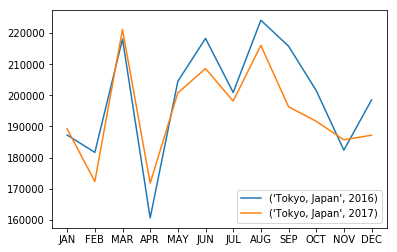

In [370]:
x_axis=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
y_2013_axis = final_df.loc[(top_ten_cities[2], 2013), "JAN":"DEC"]
y_2014_axis = final_df.loc[(top_ten_cities[2], 2014), "JAN":"DEC"]
y_2015_axis = final_df.loc[(top_ten_cities[2], 2015), "JAN":"DEC"]
y_2016_axis = final_df.loc[(top_ten_cities[2], 2016), "JAN":"DEC"]
y_2017_axis = final_df.loc[(top_ten_cities[2], 2017), "JAN":"DEC"]
#plt.plot(x_axis, y_2013_axis)
#plt.plot(x_axis, y_2014_axis)
#plt.plot(x_axis, y_2015_axis)
plt.plot(x_axis, y_2016_axis)
plt.plot(x_axis, y_2017_axis)
plt.legend(loc="best")